In [16]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from utils import BayesianLinearRegression

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Model evidence: -21.60665485268068


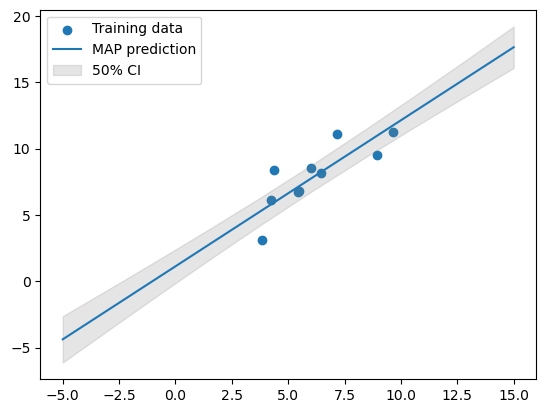

In [27]:
# 1. Generate some simple 1d dataset X, y
np.random.seed(0)

num_samples = 10

X = np.random.uniform(0, 10, num_samples).reshape(-1, 1)  # num_samples data points in 1D
true_slope = 1
true_intercept = 1
y = true_slope * X.flatten() + true_intercept + np.random.normal(0, 2, X.shape[0])

# 2. Fit this model
model = BayesianLinearRegression(
    b_0=2, alpha_0=1, delta_0=1, X_train=X, y_train=y, bias=True
)

# 3. Predict confidence intervals on a grid of test points
X_test = np.linspace(-5, 15, num_samples).reshape(-1, 1)
coverage = 0.50  
confidence_intervals = model.predict_confidence_interval(X_test, coverage)

evidence = model.evidence()
print(f"Model evidence: {evidence}")

# Visualize
plt.scatter(X, y, label="Training data")
plt.plot(X_test, model.predict_MAP(X_test), label="MAP prediction")
plt.fill_between(
    X_test.flatten(),
    confidence_intervals[:, 0],
    confidence_intervals[:, 1],
    color="gray",
    alpha=0.2,
    label=f"{int(coverage * 100)}% CI",
)
plt.legend()
plt.show()